<h2 align="center">BERT tutorial: Classify spam vs no spam emails</h2>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

ImportError: dlopen(/Users/joseph/miniforge3/envs/tfenv/lib/python3.9/site-packages/tensorflow_text/core/pybinds/tflite_registrar.so, 0x0002): Symbol not found: (__ZN4absl12lts_2021110210CHexEscapeENS0_11string_viewE)
  Referenced from: '/Users/joseph/miniforge3/envs/tfenv/lib/python3.9/site-packages/tensorflow_text/core/pybinds/tflite_registrar.so'
  Expected in: '/Users/joseph/miniforge3/envs/tfenv/lib/python3.9/site-packages/tensorflow/libtensorflow_framework.2.dylib'

<h4>Import the dataset (Dataset is taken from kaggle)</h4>

In [17]:
import pandas as pd

df = pd.read_csv("../spam.csv", encoding="ISO-8859-1")
df = df[["Category","Message"]]
df.head(5)

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [18]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [19]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [20]:
747/4825

0.15481865284974095

**15% spam emails, 85% ham emails: This indicates class imbalance**

In [21]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [22]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [23]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [24]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [25]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [26]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

Category                                            Message  spam
476       ham                       Love you aathi..love u lot..     0
2501      ham                       No da..today also i forgot..     0
1072     spam  Dear U've been invited to XCHAT. This is our f...     1
4167     spam  Congrats! Nokia 3650 video camera phone is you...     1
267      spam  Ur ringtone service has changed! 25 Free credi...     1

<h4>Split it into training and test data set</h4>

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [28]:
X_train.head(4)

796     Orange customer, you may now claim your FREE C...
166     URGENT! We are trying to contact you. Last wee...
3389    Please CALL 08712402972 immediately as there i...
1683       Already am squatting is the new way of walking
Name: Message, dtype: object

<h4>Now lets import BERT model and get embeding vectors for few sample statements</h4>

In [14]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-11-24 08:26:52.427070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-24 08:26:52.427204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-24 08:26:55.373771: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-24 08:26:55.395162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [29]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

print(bert_preprocess([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]))

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

NotFoundError: Exception encountered when calling layer "keras_layer" (type KerasLayer).

Graph execution error:

No registered 'AddN' OpKernel for 'GPU' devices compatible with node {{node StatefulPartitionedCall/StatefulPartitionedCall/bert_pack_inputs/PartitionedCall/RaggedConcat/ArithmeticOptimizer/AddOpsRewrite_Leaf_0_add_2}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: N=2, T=DT_INT64, _XlaHasReferenceVars=false, _grappler_ArithmeticOptimizer_AddOpsRewriteStage=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"
	.  Registered:  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, 16534343205130372495, DT_COMPLEX128, DT_HALF, DT_UINT32, DT_UINT64, DT_VARIANT]
  device='GPU'; T in [DT_FLOAT]
  device='DEFAULT'; T in [DT_INT32]
  device='CPU'; T in [DT_UINT64]
  device='CPU'; T in [DT_INT64]
  device='CPU'; T in [DT_UINT32]
  device='CPU'; T in [DT_UINT16]
  device='CPU'; T in [DT_INT16]
  device='CPU'; T in [DT_UINT8]
  device='CPU'; T in [DT_INT8]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_VARIANT]

	 [[StatefulPartitionedCall/StatefulPartitionedCall/bert_pack_inputs/PartitionedCall/RaggedConcat/ArithmeticOptimizer/AddOpsRewrite_Leaf_0_add_2]] [Op:__inference_restored_function_body_52292]

Call arguments received by layer "keras_layer" (type KerasLayer):
  • inputs=["'500$ discount. hurry up'", "'Bhavin, are you up for a volleybal game tomorrow?'"]
  • training=None

<h4>Get embeding vectors for few sample words. Compare them using cosine similarity</h4>

In [36]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

2022-11-23 20:27:42.059110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


NotFoundError: Exception encountered when calling layer "keras_layer_2" (type KerasLayer).

Graph execution error:

No registered 'AddN' OpKernel for 'GPU' devices compatible with node {{node StatefulPartitionedCall/StatefulPartitionedCall/bert_pack_inputs/PartitionedCall/RaggedConcat/ArithmeticOptimizer/AddOpsRewrite_Leaf_0_add_2}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: N=2, T=DT_INT64, _XlaHasReferenceVars=false, _grappler_ArithmeticOptimizer_AddOpsRewriteStage=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"
	.  Registered:  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, 16534343205130372495, DT_COMPLEX128, DT_HALF, DT_UINT32, DT_UINT64, DT_VARIANT]
  device='GPU'; T in [DT_FLOAT]
  device='DEFAULT'; T in [DT_INT32]
  device='CPU'; T in [DT_UINT64]
  device='CPU'; T in [DT_INT64]
  device='CPU'; T in [DT_UINT32]
  device='CPU'; T in [DT_UINT16]
  device='CPU'; T in [DT_INT16]
  device='CPU'; T in [DT_UINT8]
  device='CPU'; T in [DT_INT8]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_VARIANT]

	 [[StatefulPartitionedCall/StatefulPartitionedCall/bert_pack_inputs/PartitionedCall/RaggedConcat/ArithmeticOptimizer/AddOpsRewrite_Leaf_0_add_2]] [Op:__inference_restored_function_body_104599]

Call arguments received by layer "keras_layer_2" (type KerasLayer):
  • inputs=["'banana'", "'grapes'", "'mango'", "'jeff bezos'", "'elon musk'", "'bill gates'"]
  • training=None

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911089]], dtype=float32)

Values near to 1 means they are similar. 0 means they are very different.
Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [24]:
cosine_similarity([e[0]],[e[3]])

array([[0.8470385]], dtype=float32)

Comparing banana with jeff bezos you still get 0.84 but it is not as close as 0.99 that we got with grapes

In [25]:
cosine_similarity([e[3]],[e[4]])

array([[0.98720354]], dtype=float32)

Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

<h4>Build Model</h4>

There are two types of models you can build in tensorflow. 

(1) Sequential
(2) Functional

So far we have built sequential model. But below we will build functional model. More information on these two is here: https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

In [26]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

https://stackoverflow.com/questions/47605558/importerror-failed-to-import-pydot-you-must-install-pydot-and-graphviz-for-py

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [28]:
len(X_train)

1120

In [29]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

<h4>Train the model</h4>

In [31]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 7s 189ms/step - loss: 0.3398 - accuracy: 0.8857 - precision: 0.8750 - recall: 0.9000 2s - loss: 0.3473 - accuracy: 0.8854 - precision: 0.8672 -
Epoch 2/10
35/35 [==============================] - 6s 185ms/step - loss: 0.3271 - accuracy: 0.8857 - precision: 0.8649 - recall: 0.9143
Epoch 3/10
35/35 [==============================] - 7s 187ms/step - loss: 0.3093 - accuracy: 0.8920 - precision: 0.8844 - recall: 0.9018
Epoch 4/10
35/35 [==============================] - 7s 187ms/step - loss: 0.2920 - accuracy: 0.9071 - precision: 0.8986 - recall: 0.9179
Epoch 5/10
35/35 [==============================] - 7s 187ms/step - loss: 0.2837 - accuracy: 0.9098 - precision: 0.9076 - recall: 0.9125
Epoch 6/10
35/35 [==============================] - 7s 187ms/step - loss: 0.2741 - accuracy: 0.9062 - precision: 0.9027 - recall: 0.9107
Epoch 7/10
35/35 [==============================] - 7s 189ms/step - loss: 0.2643 - accuracy: 0.9089 - precision: 0.8962

In [32]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 4s 194ms/step - loss: 0.2600 - accuracy: 0.9064 - precision: 0.8486 - recall: 0.9893


[0.2599719762802124,
 0.9064171314239502,
 0.8486238718032837,
 0.9893048405647278]

In [33]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [34]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[154,  33],
       [  2, 185]], dtype=int64)

Text(33.0, 0.5, 'Truth')

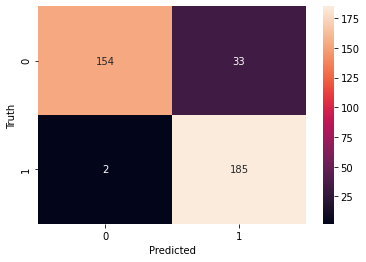

In [43]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       187
           1       0.85      0.99      0.91       187

    accuracy                           0.91       374
   macro avg       0.92      0.91      0.91       374
weighted avg       0.92      0.91      0.91       374



<h4>Inference</h4>

In [49]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.8734353 ],
       [0.92858446],
       [0.8960864 ],
       [0.29311982],
       [0.13262196]], dtype=float32)